In [1]:
# import libraries
import pandas as pd # for data manupulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

In [2]:
#Load breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [3]:
# create datafrmae
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'],cancer_dataset['target']],
             columns = np.append(cancer_dataset['feature_names'], ['target']))

In [4]:
# create second DataFrame by droping target
cancer_df2 = cancer_df.drop(['target'], axis = 1)
print("The shape of 'cancer_df2' is : ", cancer_df2.shape)

The shape of 'cancer_df2' is :  (569, 30)


c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


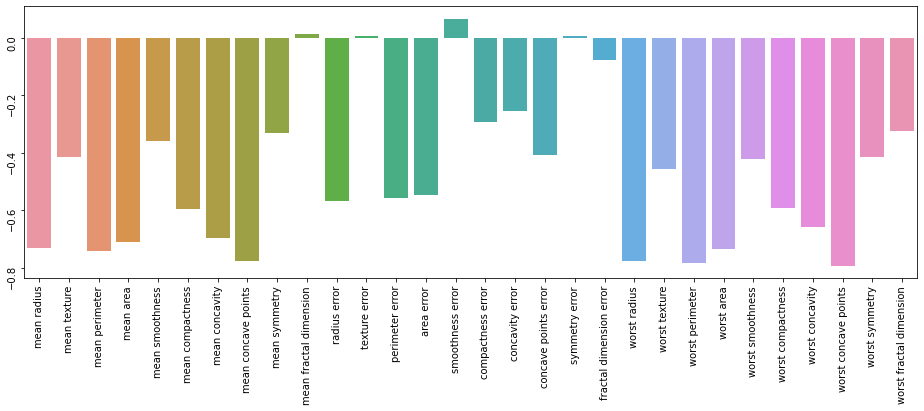

In [5]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(cancer_df2.corrwith(cancer_df.target).index, cancer_df2.corrwith(cancer_df.target))
ax.tick_params(labelrotation = 90)

In [6]:
# input variable
X = cancer_df.drop(['target'], axis = 1)
X.head(6)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [8]:
# output variable
y = cancer_df['target']
y.head(6)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: target, dtype: float64

In [9]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)


In [10]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [12]:
# Train with Standard scaled Data
from xgboost import XGBClassifier
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_xgb_sc)

c:\users\vikas\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:53:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


NameError: name 'accuracy_score' is not defined